# Data Analysis and Visualization on Coronavirus
Coronavirus is a family of viruses that are named after their spiky crown. The novel coronavirus, also known as SARS-CoV-2, is a contagious respiratory virus that first reported in Wuhan, China. On 2/11/2020, the World Health Organization designated the name COVID-19 for the disease caused by the novel coronavirus. 

This notebook aims at exploring COVID-19 through data analysis and projections. 

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib.colors as mcolors
import random
import math
import time
import datetime


## Data importation
 All the csv files are imported from [Github Database](https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data/csse_covid_19_time_series). These datas need to be updated on a daily basis.
 
All these datas are showing cumulative values over days. 

In [2]:
confirmed_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
deaths_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
recoveries_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')

latest_data = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/07-25-2020.csv')
us_medical_data = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports_us/07-25-2020.csv')



In [3]:
confirmed_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,7/18/20,7/19/20,7/20/20,7/21/20,7/22/20,7/23/20,7/24/20,7/25/20,7/26/20,7/27/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,35301,35475,35526,35615,35727,35928,35981,36036,36157,36263
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,4008,4090,4171,4290,4358,4466,4570,4637,4763,4880
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,22549,23084,23691,24278,24872,25484,26159,26764,27357,27973
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,880,880,884,884,889,889,897,897,897,907
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,687,705,749,779,812,851,880,916,932,950


In [4]:
deaths_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,7/18/20,7/19/20,7/20/20,7/21/20,7/22/20,7/23/20,7/24/20,7/25/20,7/26/20,7/27/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,1164,1181,1185,1186,1190,1211,1225,1248,1259,1269
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,111,112,113,117,120,123,128,134,138,144
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,1068,1078,1087,1100,1111,1124,1136,1146,1155,1163
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,52,52,52,52,52,52,52,52,52,52
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,29,29,29,30,33,33,35,39,40,41


In [5]:
recoveries_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,7/18/20,7/19/20,7/20/20,7/21/20,7/22/20,7/23/20,7/24/20,7/25/20,7/26/20,7/27/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,23273,23634,23741,23741,23924,24550,24602,24793,25180,25198
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,2264,2311,2352,2397,2463,2523,2608,2637,2682,2745
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,15744,16051,16400,16646,16983,17369,17369,18076,18088,18837
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,803,803,803,803,803,803,803,803,803,803
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,210,221,221,221,221,236,241,242,242,242


In [6]:
latest_data.head()

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incidence_Rate,Case-Fatality_Ratio
0,45001.0,Abbeville,South Carolina,US,2020-07-26 04:35:00,34.223334,-82.461707,264,4,0,260.0,"Abbeville, South Carolina, US",1076.364822,1.515152
1,22001.0,Acadia,Louisiana,US,2020-07-26 04:35:00,30.295065,-92.414197,2111,62,0,2049.0,"Acadia, Louisiana, US",3402.369248,2.936997
2,51001.0,Accomack,Virginia,US,2020-07-26 04:35:00,37.767072,-75.632346,1060,15,0,1045.0,"Accomack, Virginia, US",3280.108924,1.415094
3,16001.0,Ada,Idaho,US,2020-07-26 04:35:00,43.452658,-116.241552,6732,45,0,6687.0,"Ada, Idaho, US",1397.878265,0.668449
4,19001.0,Adair,Iowa,US,2020-07-26 04:35:00,41.330756,-94.471059,20,0,0,20.0,"Adair, Iowa, US",279.642058,0.000000


In [7]:
us_medical_data.head()

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
0,Alabama,US,2020-07-26 04:35:13,32.3182,-86.9023,78130,1456,32510.0,44164.0,1,1593.454051,641611.0,9157.0,1.863561,84000001,USA,13085.596403,11.720210
1,Alaska,US,2020-07-26 04:35:13,61.3707,-152.4044,2339,20,815.0,1504.0,2,319.734261,205066.0,NaN,0.855066,84000002,USA,28031.905078,NaN
2,American Samoa,US,2020-07-26 04:35:13,-14.2710,-170.1320,0,0,NaN,0.0,60,0.000000,1037.0,NaN,NaN,16,ASM,1863.733578,NaN
3,Arizona,US,2020-07-26 04:35:13,33.7298,-111.4312,160041,3286,20566.0,136189.0,4,2198.752885,857609.0,7627.0,2.053224,84000004,USA,11782.419896,4.765654
4,Arkansas,US,2020-07-26 04:35:13,34.9697,-92.3731,37981,399,29827.0,7755.0,5,1258.564174,461464.0,2361.0,1.050525,84000005,USA,15291.384066,6.216266


## Plot confirmed cases, deaths, recoveries,  active cases in the world (cumulative over time)

In [8]:
def plot_Data(Data,s,plottype):
    days=np.linspace(0,len(Data), len(Data))
    Data_moving_average=Data.rolling(window=10).mean()
    plt.figure(figsize=(8, 5))
    if plottype=='P':
        plt.plot(days, Data)
    else:
        plt.bar(days, Data)
    plt.plot(days, Data_moving_average, linestyle='dashed', color='orange')
    plt.title(s, size=12)
    plt.xlabel('Number of Days Since 1/22/2020', size=12)
    plt.ylabel('# of '+s, size=12)
    plt.legend([s , 'Moving Average 10 Days'], prop={'size': 12})
    plt.xlim(0,len(days))
    plt.xticks(size=12)
    plt.yticks(size=12)
    plt.show()


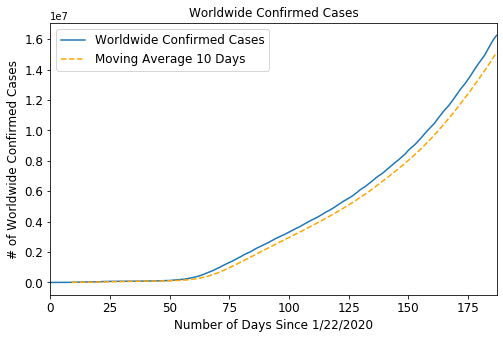

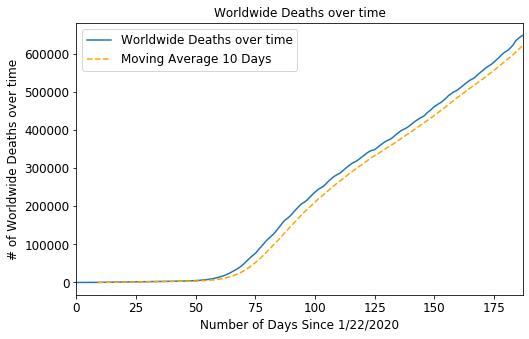

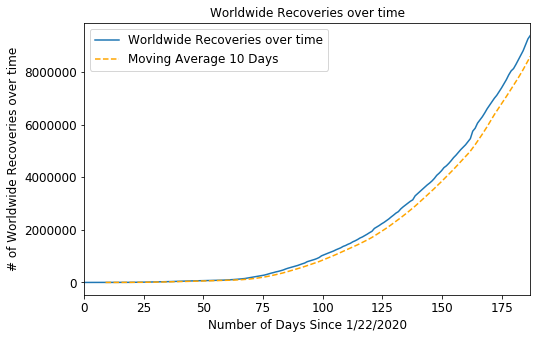

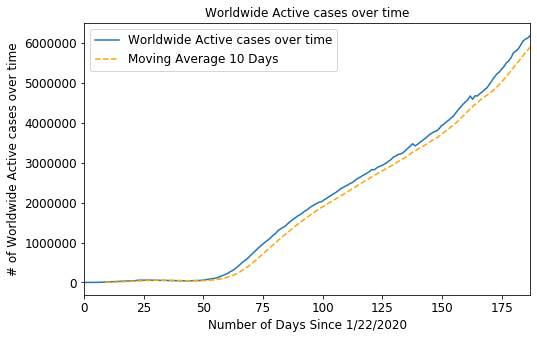

In [9]:
confirmed_since_Jan=confirmed_df.iloc[:,4:-1]
plot_Data(confirmed_since_Jan.sum(),'Worldwide Confirmed Cases','P')
deaths_since_Jan=deaths_df.iloc[:,4:-1]
plot_Data(deaths_since_Jan.sum(),'Worldwide Deaths over time','P')
recoveries_since_Jan=recoveries_df.iloc[:,4:-1]
plot_Data(recoveries_since_Jan.sum(),'Worldwide Recoveries over time','P')

active_cases_since_Jan=confirmed_since_Jan-deaths_since_Jan-recoveries_since_Jan
plot_Data(active_cases_since_Jan.sum(),'Worldwide Active cases over time','P')

## Plot confirmed cases, deaths, recoveries in the world (Number of daily increase)

In [10]:
def Daily_increase(A):  # A must be a dataframe
    B=A.shift(1,axis='columns')
    return A-B


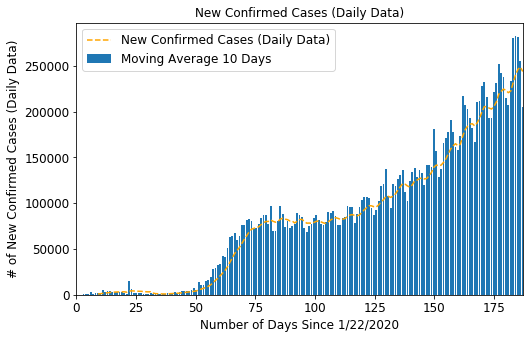

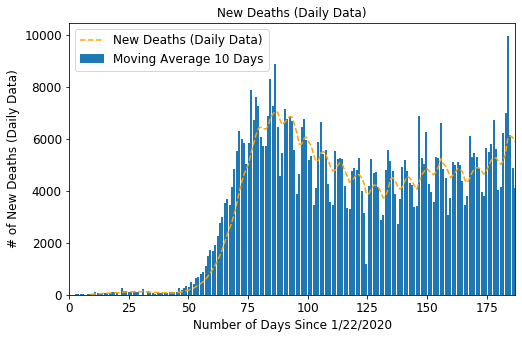

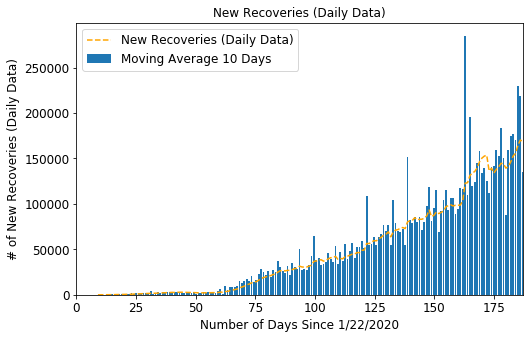

In [11]:
confirmed_daily_increase=Daily_increase(confirmed_since_Jan)
plot_Data(confirmed_daily_increase.sum(),'New Confirmed Cases (Daily Data)', 'B')
deaths_daily_increase=Daily_increase(deaths_since_Jan)
plot_Data(deaths_daily_increase.sum(),'New Deaths (Daily Data)', 'B')
recoveries_daily_increase=Daily_increase(recoveries_since_Jan)
plot_Data(recoveries_daily_increase.sum(),'New Recoveries (Daily Data)', 'B')


## Plot confirmed cases, deaths, recoveries in a specific country (Number of daily increase)
We will see the above graphs but for a specific country, We wil input the name of the country and it will extract informations about that country from the previous dataframes. Then we will generate the above graphs for 

Enter the name of CountryCanada
<class 'pandas.core.frame.DataFrame'>


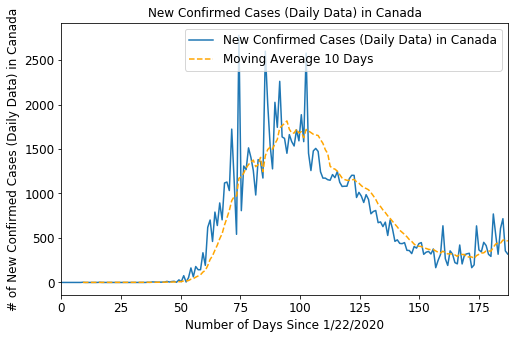

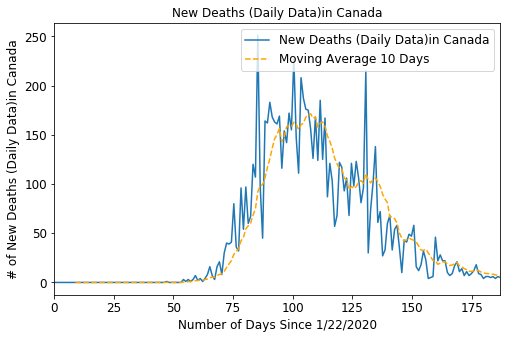

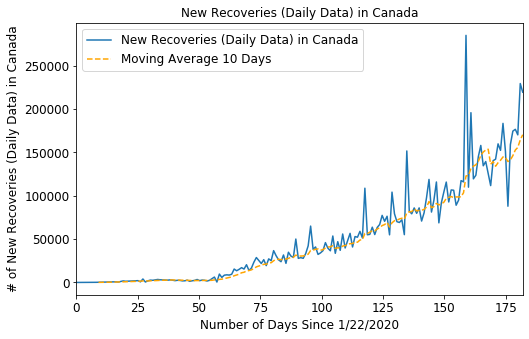

In [13]:
C=input('Enter the name of Country')

confirmed_country =confirmed_df.loc[confirmed_df["Country/Region"]==C,:]
deaths_country = deaths_df.loc[deaths_df["Country/Region"]==C,:]
recoveries_country= recoveries_df.loc[recoveries_df["Country/Region"]==C,:]
latest_country=latest_data.loc[latest_data["Country_Region"]==C,:]

print(type(confirmed_country))
C_confirmed_daily=Daily_increase(confirmed_country.iloc[:,4:-1])
plot_Data(C_confirmed_daily.sum(),'New Confirmed Cases (Daily Data) in '+C, 'P') 
#Some countries have states in the datatables, so sum function used to sum the states
C_deaths_daily=Daily_increase(deaths_country.iloc[:,4:-1])
plot_Data(C_deaths_daily.sum(),'New Deaths (Daily Data)in '+C, 'P')
C_recoveries_daily=Daily_increase(recoveries_since_Jan.iloc[:,4:-1])
plot_Data(C_recoveries_daily.sum(),'New Recoveries (Daily Data) in '+C, 'P')
    

# Plot deaths vs. recoveries in the world (Cumulative)

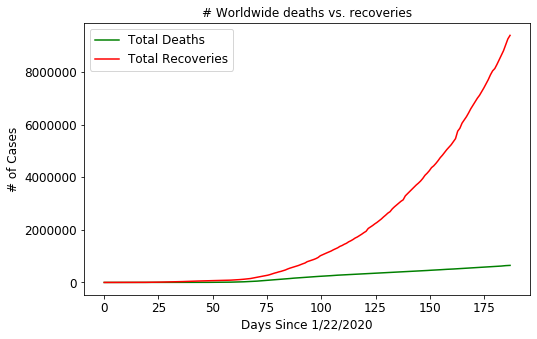

In [15]:
plt.figure(figsize=(8, 5))
days=np.linspace(0,len(confirmed_since_Jan.sum()), len(confirmed_since_Jan.sum()))
plt.plot(days, deaths_since_Jan.sum(), color='green')
plt.plot(days, recoveries_since_Jan.sum(), color='r')
plt.legend(['Total Deaths', 'Total Recoveries'], loc='best', fontsize=12)
plt.title('# Worldwide deaths vs. recoveries', size=12)
plt.xlabel('Days Since 1/22/2020', size=12)
plt.ylabel('# of Cases', size=12)
plt.xticks(size=12)
plt.yticks(size=12)
plt.show()

# Data Analysis on Latest Data

In [23]:
# Print number of countries interted in the datatable
print(len(latest_data.groupby('Country_Region').groups))
print(len(latest_data.loc[:,'Country_Region'].unique()))

Country_Region
Afghanistan           36036
Albania                4637
Algeria               26764
Andorra                 897
Angola                  916
                      ...  
West Bank and Gaza    10306
Western Sahara           10
Yemen                  1674
Zambia                 4328
Zimbabwe               2434
Name: Confirmed, Length: 188, dtype: int64
188


In [87]:
Country_group=latest_data.groupby('Country_Region')
Countries=list(Country_group.groups)

Recent= pd.DataFrame(  {'Country Name': Countries,  
                        'Number of Confirmed Cases': Country_group['Confirmed'].sum(),
                        'Number of Deaths': Country_group['Deaths'].sum(), 
                        'Number of Recoveries' : Country_group['Recovered'].sum(), 
                        'Number of Active Cases' : Country_group['Active'].sum(),
                        'Case-Fatality_Ratio': Country_group['Case-Fatality_Ratio'].sum()})


Recent=Recent.reset_index() 
Recent=Recent.drop('Country_Region',axis=1)

#Recent.describe()
Recent.style.background_gradient(cmap='Greens')

,Country Name,Number of Confirmed Cases,Number of Deaths,Number of Recoveries,Number of Active Cases,Case-Fatality_Ratio
0,Afghanistan,36036,1248,24793,9995.000000,3.463203
1,Albania,4637,134,2637,1866.000000,2.889799
2,Algeria,26764,1146,18076,7542.000000,4.281871
3,Andorra,897,52,803,42.000000,5.797101
4,Angola,916,39,242,635.000000,4.257642
5,Antigua and Barbuda,82,3,60,19.000000,3.658537
6,Argentina,158334,2893,68022,87419.000000,1.827150
7,Armenia,36996,700,26243,10053.000000,1.892096
8,Australia,14403,155,9019,5229.000000,13.355722
9,Austria,20338,712,18124,1502.000000,3.500836


## Identify the 10 countries with highest number of active cases

In [111]:
t=Recent['Number of Active Cases'].nlargest(10).index
Recent_10=Recent.iloc[t, :]
Recent_10=Recent_10.reset_index().drop('index',1)

Recent_10.style.background_gradient(cmap='Greens')

,Country Name,Number of Confirmed Cases,Number of Deaths,Number of Recoveries,Number of Active Cases,Case-Fatality_Ratio
0,US,4178021,146460,1279414,2784120.000000,10582.247160
1,Brazil,2394513,86449,1785359,522705.000000,80.476774
2,India,1385635,32060,885573,468002.000000,41.458687
3,United Kingdom,300270,45823,1427,253020.000000,92.492225
4,Russia,805332,13172,596064,196096.000000,99.424417
5,South Africa,434200,6655,263054,164491.000000,1.532704
6,Colombia,240795,8269,119667,112859.000000,102.325946
7,France,217801,30195,80945,106661.000000,35.517555
8,Peru,375961,17843,259423,98695.000000,106.600050
9,Bangladesh,221178,2874,122090,96214.000000,1.299406


## Pie Chart Visualizations for COVID-19

In [131]:
def plot_pie_charts(x, y, title):
    c = random.choices(list(mcolors.CSS4_COLORS.values()),k = len(x))
    plt.figure(figsize=(15,10))
    plt.title(title, size=12)
    plt.pie(y, colors=c)
    plt.legend(x,loc='best', fontsize=12)
    plt.show()

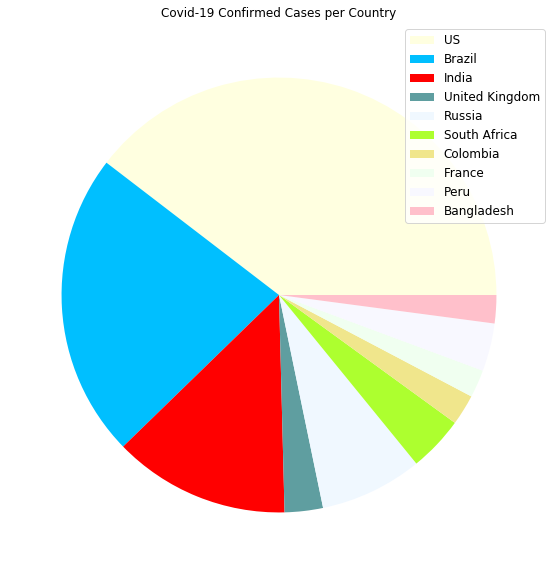

In [132]:
plot_pie_charts(Recent_10['Country Name'], Recent_10['Number of Confirmed Cases'], 'Covid-19 Confirmed Cases per Country')